# 20250220 analysis

In [ ]:
%load_ext autoreload
%autoreload 2

from cdk.analysis.cytosol import platereader as pr
import matplotlib.pyplot as plt
import seaborn as sns

pr.plot_setup()

In [2]:
data, platemap = pr.load_platereader_data(
    data_file="./data/20250220-MTHFS-02.txt", 
    platemap_file="./data/platemap.tsv", 
    platereader="biotek"
)
data

,Well,Row,Column,Time,Seconds,Temperature (C),Read,Data,Sample #,Name,...,SMS-03-06,bnext p-mix-03-03,NEB Solution A,NEB solution B,RNAse Inhibitor,DNA (deGFP),H2O,MTHFS,"0.2 mM 5,10-methenyl-THF",Total Volume
0,D2,D,2,0 days 00:00:00,0.00,37.00,"485/20,528/20",0.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
1,D2,D,2,0 days 00:05:00,300.00,37.00,"485/20,528/20",7.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
2,D2,D,2,0 days 00:10:00,600.00,37.00,"485/20,528/20",17.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
3,D2,D,2,0 days 00:15:00,900.00,37.00,"485/20,528/20",30.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
4,D2,D,2,0 days 00:20:00,1200.00,37.00,"485/20,528/20",40.00,1,no folinic acid,...,4.00,1.30,NaN,NaN,0.40,0.50,1.00,0.00,NaN,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,D20,D,20,0 days 08:40:00,31200.00,37.00,"485/20,528/20",5.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1086,D20,D,20,0 days 08:45:00,31500.00,37.00,"485/20,528/20",5.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1087,D20,D,20,0 days 08:50:00,31800.00,37.00,"485/20,528/20",6.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00
1088,D20,D,20,0 days 08:55:00,32100.00,37.00,"485/20,528/20",6.00,10,Negative,...,NaN,NaN,4.00,3.00,0.00,0.00,3.00,NaN,NaN,10.00


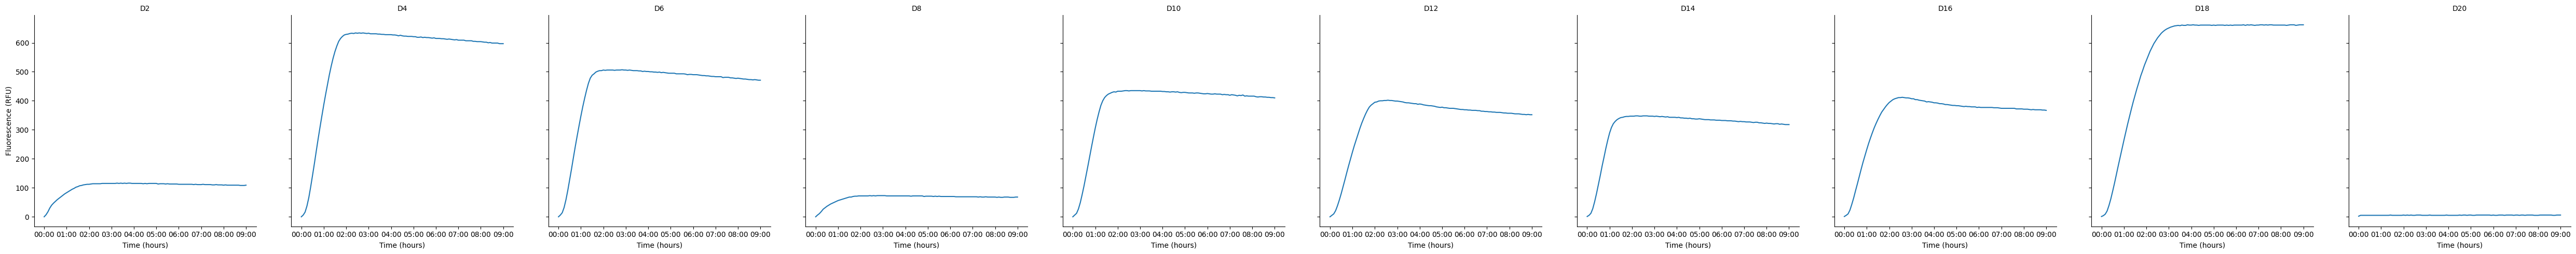

In [3]:
pr.plot_plate(data)

In [64]:
names_to_remove = ['5,10-methenyl-THF', 
                   'folinic + BE MTHFS (1 uL)', 
                   'folinic + BE MTHFS (1.61 uL)',
                   'NEB ribosome control']

replace_dict = {'no folinic acid':'no Folinic Acid',
                'no folinic + 5,10-methenyl-THF':'5,10-methenyl-THF',
                'folinic':'Folinic Acid',
                'folinic + MTHFS (0.5 uL)':'Folinic Acid + MTHFS'}

custom_order = ['no Folinic Acid', 
                'Folinic Acid', 
                'Folinic Acid + MTHFS', 
                '5,10-methenyl-THF', 
                'Positive', 
                'Negative']

data_drop = data.drop(data[data['Name'].isin(names_to_remove)].index)
data_drop['Name'] = data_drop['Name'].replace(replace_dict)


(0.0, 0.35)

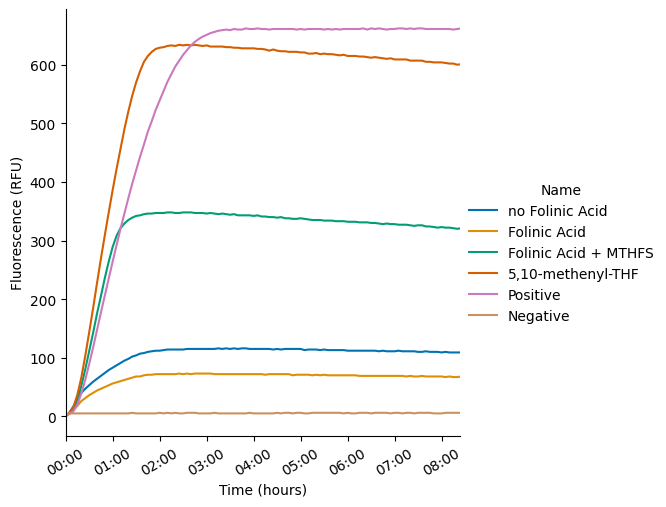

In [65]:
#| label: fig:20250220-kinetics

# Generate the plot (assuming `pr.plot_curves` returns a FacetGrid object)
sns.set_palette('colorblind')
g = pr.plot_curves(data_drop, hue_order=custom_order)
g.set_xticklabels(rotation=30)
plt.xlim([0,0.35])

/data/bnext/code/bnext/cdk/src/cdk/analysis/cytosol/platereader.py:823: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


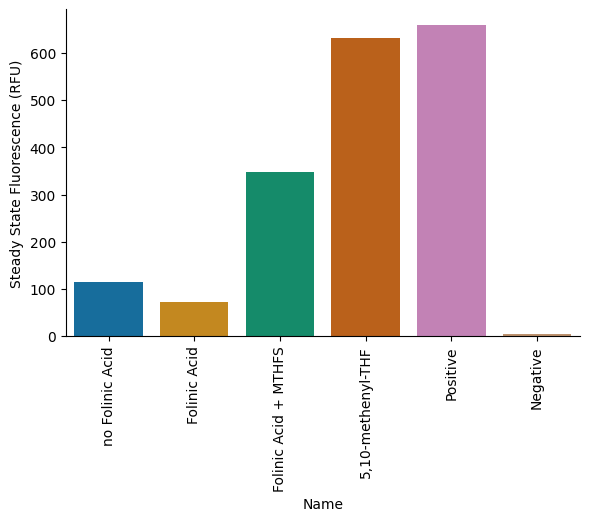

In [66]:
#| label: fig:20250220-endpoint

pr.plot_steadystate(data_drop, order=custom_order, palette='colorblind')

/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


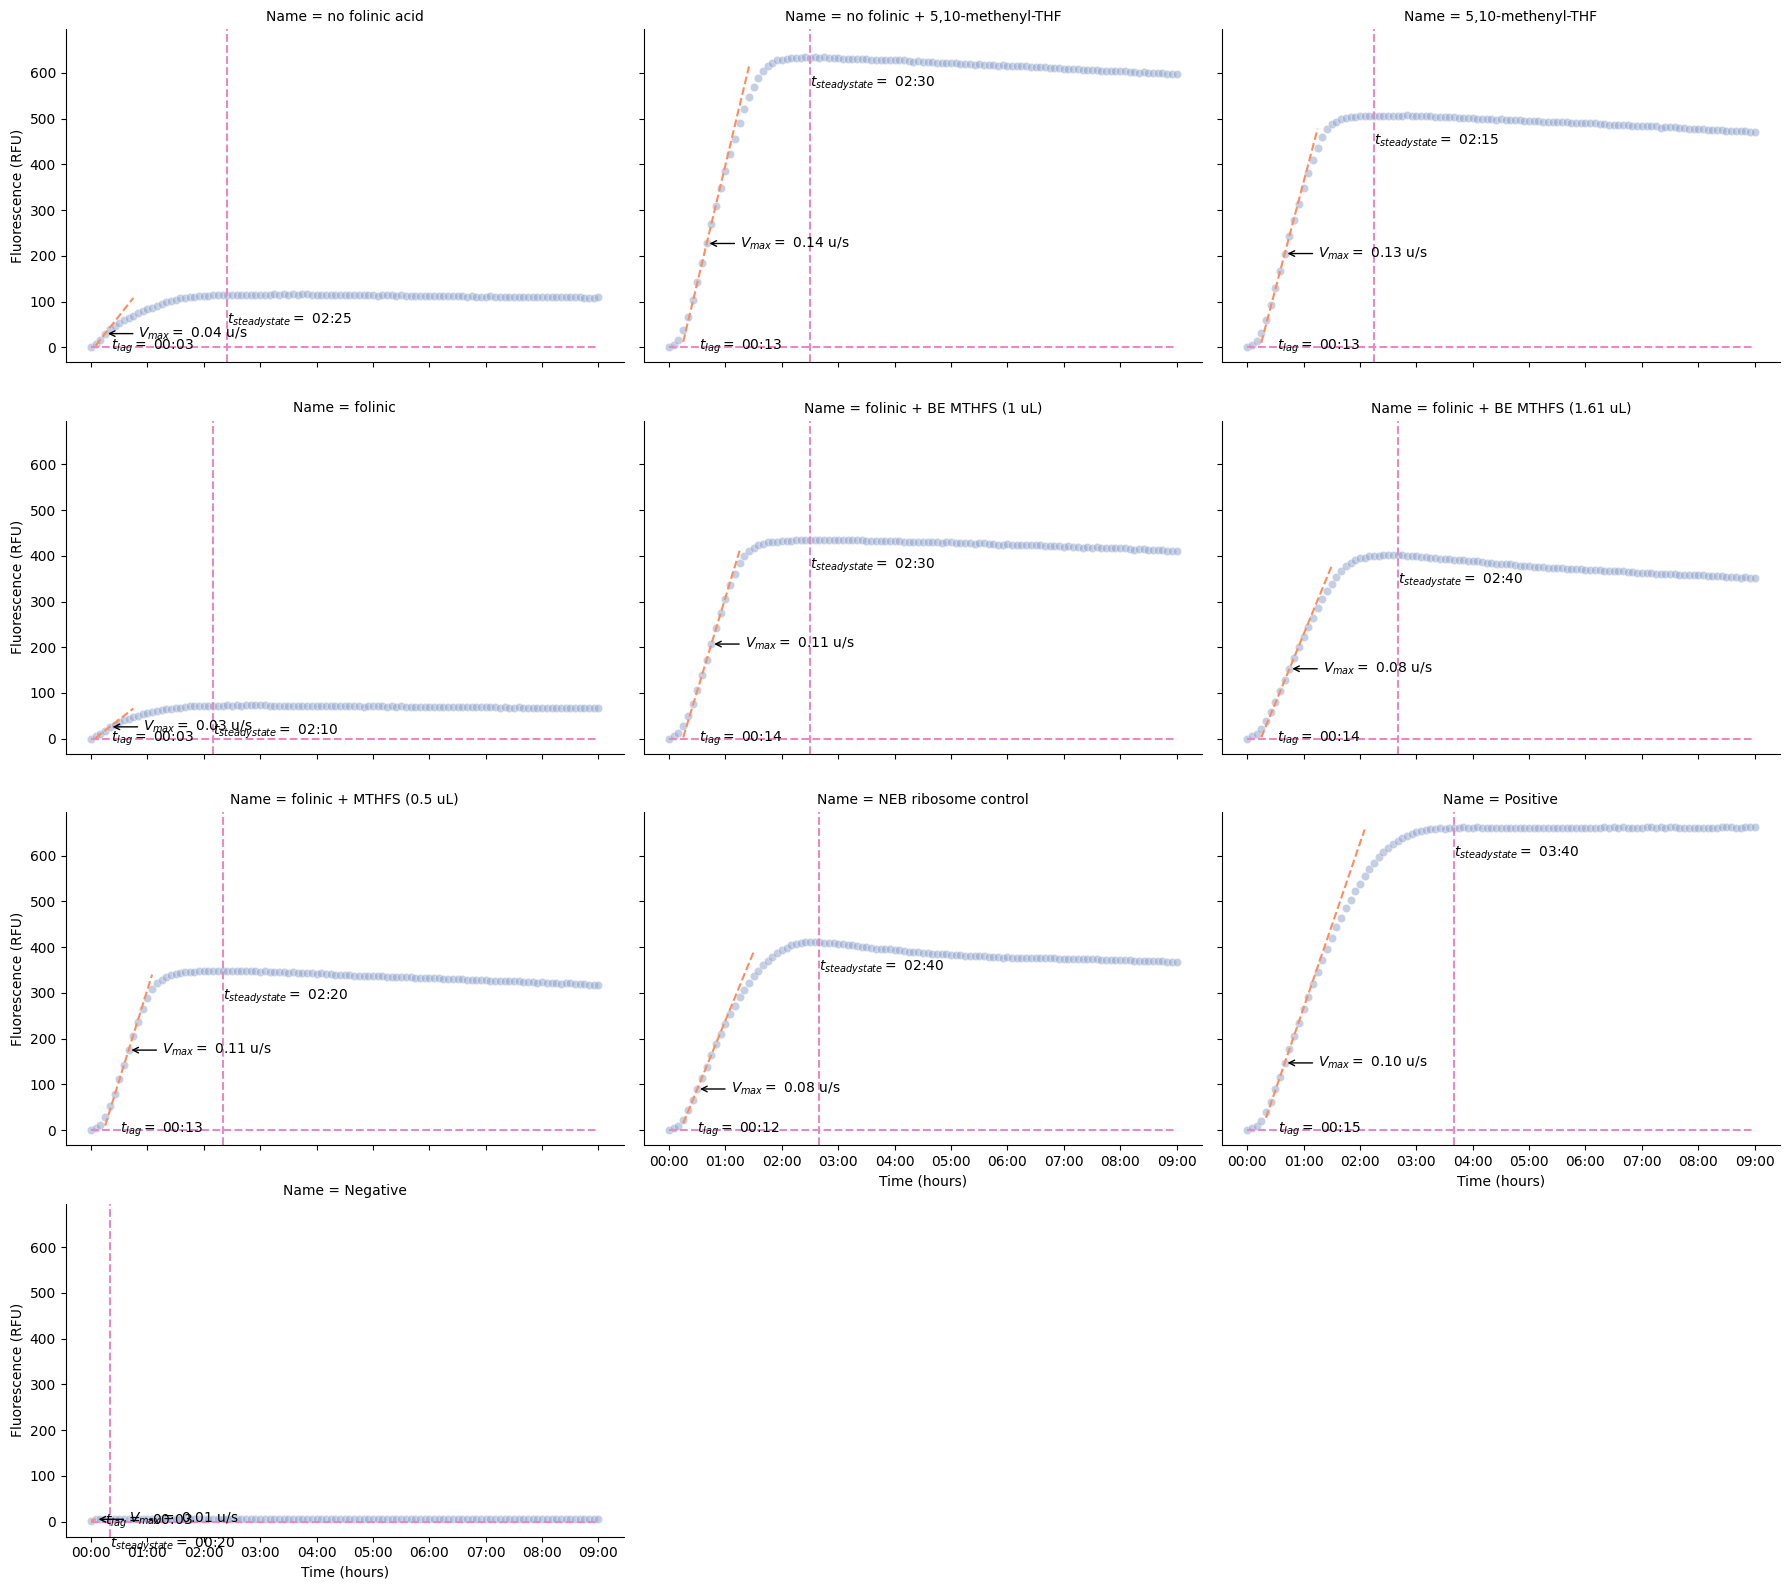

In [60]:
kinetics = pr.kinetic_analysis(data)
pr.plot_kinetics(data, kinetics)

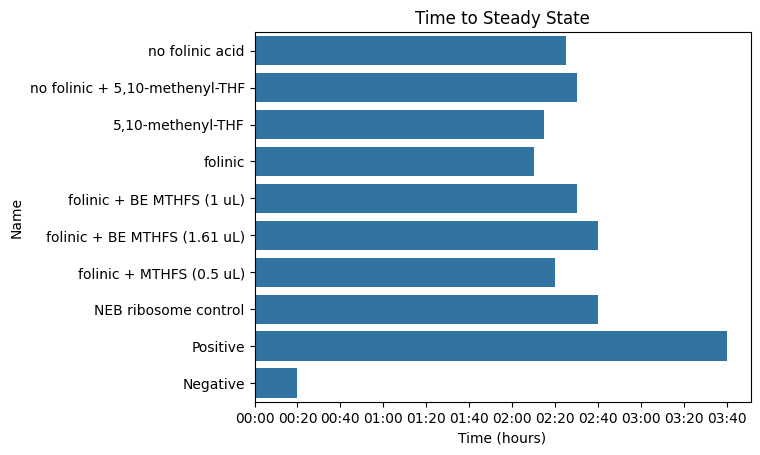

In [61]:
ax = sns.barplot(data=kinetics["Steady State"], y="Name", x="Time", orient="y")
ax.set_title("Time to Steady State")
pr._plot_timedelta(ax)


Text(0.5, 0, '$V_{max}$ (u/s)')

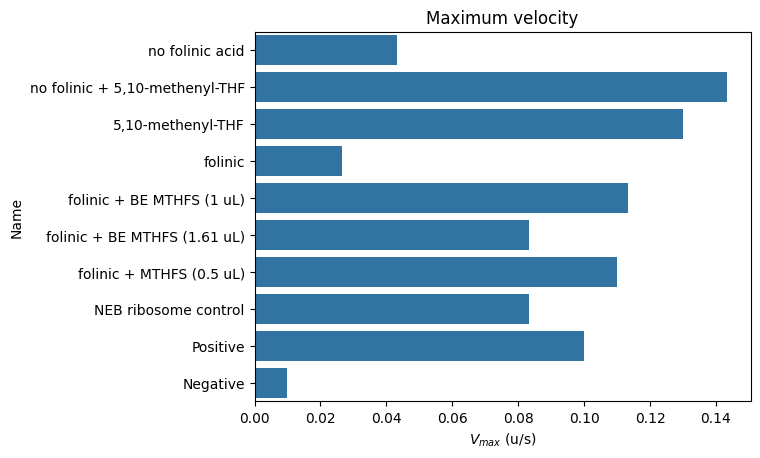

In [62]:
ax = sns.barplot(data=kinetics["Velocity"], y="Name", x="Max", orient="y")
ax.set_title("Maximum velocity")
ax.set_xlabel("$V_{max}$ (u/s)")

# Annotate plots

In [63]:
data, platemap = pr.load_platereader_data("./data/20250220-MTHFS-02.txt", "./platemap-acjs.tsv", platereader="biotek")
kinetics = pr.kinetic_analysis(data)

/opt/anaconda3/envs/bnext-cdk/lib/python3.12/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [64]:
steadystate = pr.find_steady_state(data).reset_index().merge(platemap, on="Well")
steadystate.head()

,Well,Read,Time_steadystate,Data_steadystate,Sample #,Type,Name,Folinic,MTHFS BE,NEB ribosome,...,SMS-03-06,bnext p-mix-03-03,NEB Solution A,NEB solution B,RNAse Inhibitor,DNA (deGFP),H2O,MTHFS,"0.2 mM 5,10-methenyl-THF",Total Volume
0,D10,"485/20,528/20",0 days 02:30:00,434.00,5,Folinic,folinic + BE MTHFS (1 uL),Yes,Yes,1.80,...,4.00,1.30,NaN,NaN,0.40,0.50,0.00,1.00,NaN,10.00
1,D12,"485/20,528/20",0 days 02:40:00,401.00,6,Folinic,folinic + BE MTHFS (1.61 uL),Yes,Yes,1.80,...,4.00,1.30,NaN,NaN,0.40,0.50,0.00,1.61,NaN,10.61
2,D14,"485/20,528/20",0 days 02:20:00,347.00,7,Folinic,folinic + MTHFS (0.5 uL),Yes,No,1.80,...,4.00,1.30,NaN,NaN,0.40,0.50,0.50,0.50,NaN,10.00
3,D16,"485/20,528/20",0 days 02:40:00,411.00,8,Control,NEB ribosome control,No,No,1.80,...,NaN,NaN,4.00,NaN,0.40,0.50,2.10,NaN,NaN,10.00
4,D18,"485/20,528/20",0 days 03:40:00,660.00,9,Control,Positive,No,No,NaN,...,NaN,NaN,4.00,3.00,0.40,0.50,2.10,NaN,NaN,10.00


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'no folinic acid'),
  Text(1, 0, 'no folinic + 5,10-methenyl-THF'),
  Text(2, 0, '5,10-methenyl-THF'),
  Text(3, 0, 'folinic'),
  Text(4, 0, 'folinic + BE MTHFS (1 uL)'),
  Text(5, 0, 'folinic + BE MTHFS (1.61 uL)'),
  Text(6, 0, 'folinic + MTHFS (0.5 uL)'),
  Text(7, 0, 'NEB ribosome control'),
  Text(8, 0, 'Positive'),
  Text(9, 0, 'Negative')])

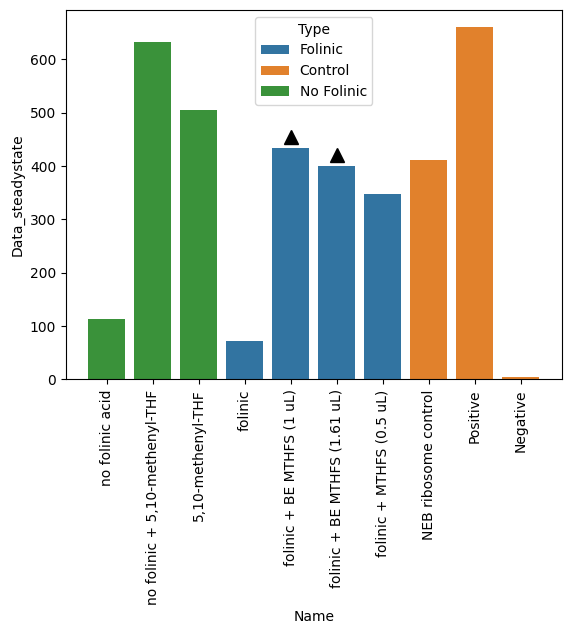

In [65]:
ax = sns.barplot(
    data=steadystate, 
    x="Name", 
    y="Data_steadystate", 
    hue="Type",
    order=data["Name"].unique(),
)

# g.set_xticklabels(rotation=90)
be = steadystate[steadystate["MTHFS BE"] == "Yes"]
ax.plot(be["Name"], be["Data_steadystate"] + 20, "^k", markersize=10)
plt.xticks(rotation=90)


# Format time

In [81]:
import pandas as pd

def format_timedelta(td):
    if pd.isna(td):
        return ''
    
    # Convert to seconds
    total_seconds = td.total_seconds()
    
    # Calculate hours, minutes, seconds
    hours = int(total_seconds // 3600)
    minutes = int((total_seconds % 3600) // 60)
    seconds = int(total_seconds % 60)
    
    # Format as HH:MM:SS
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    
bonk = kinetics.xs("Time", level=1, axis=1).map(format_timedelta)
bonk.to_excel("bonk-time.xlsx")

In [82]:
kinetics

Velocity              \
                                                             Time   Data  Max   
Well Name                           Read                                        
D2   no folinic acid                485/20,528/20 0 days 00:15:00  30.00 0.04   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20 0 days 00:40:00 227.00 0.14   
D6   5,10-methenyl-THF              485/20,528/20 0 days 00:40:00 205.00 0.13   
D8   folinic                        485/20,528/20 0 days 00:20:00  26.00 0.03   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20 0 days 00:45:00 207.00 0.11   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20 0 days 00:45:00 153.00 0.08   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20 0 days 00:40:00 175.00 0.11   
D16  NEB ribosome control           485/20,528/20 0 days 00:30:00  90.00 0.08   
D18  Positive                       485/20,528/20 0 days 00:40:00 147.00 0.10   
D20  Negative                       485/20,528/20 0 days 00:05:00   5.00 0.01   

                                                                Lag       \
                                                               Time Data   
Well Name                           Read                                   
D2   no folinic acid                485/20,528/20   0 days 00:03:27 0.00   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20   0 days 00:13:36 0.00   
D6   5,10-methenyl-THF              485/20,528/20   0 days 00:13:43 0.00   
D8   folinic                        485/20,528/20   0 days 00:03:45 0.00   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20   0 days 00:14:33 0.00   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20   0 days 00:14:24 0.00   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20   0 days 00:13:29 0.00   
D16  NEB ribosome control           485/20,528/20   0 days 00:12:00 0.00   
D18  Positive                       485/20,528/20   0 days 00:15:30 0.00   
D20  Negative                       485/20,528/20 -1 days +19:56:40 0.00   

                                                     Steady State        Fit  \
                                                             Time   Data   L   
Well Name                           Read                                       
D2   no folinic acid                485/20,528/20 0 days 02:25:00 114.00   0   
D4   no folinic + 5,10-methenyl-THF 485/20,528/20 0 days 02:30:00 633.00   0   
D6   5,10-methenyl-THF              485/20,528/20 0 days 02:15:00 506.00   0   
D8   folinic                        485/20,528/20 0 days 02:10:00  72.00   0   
D10  folinic + BE MTHFS (1 uL)      485/20,528/20 0 days 02:30:00 434.00   0   
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20 0 days 02:40:00 401.00   0   
D14  folinic + MTHFS (0.5 uL)       485/20,528/20 0 days 02:20:00 347.00   0   
D16  NEB ribosome control           485/20,528/20 0 days 02:40:00 411.00   0   
D18  Positive                       485/20,528/20 0 days 03:40:00 660.00   0   
D20  Negative                       485/20,528/20 0 days 00:20:00   5.00   0   

                                                         
                                                   k x0  
Well Name                           Read                 
D2   no folinic acid                485/20,528/20  0  0  
D4   no folinic + 5,10-methenyl-THF 485/20,528/20  0  0  
D6   5,10-methenyl-THF              485/20,528/20  0  0  
D8   folinic                        485/20,528/20  0  0  
D10  folinic + BE MTHFS (1 uL)      485/20,528/20  0  0  
D12  folinic + BE MTHFS (1.61 uL)   485/20,528/20  0  0  
D14  folinic + MTHFS (0.5 uL)       485/20,528/20  0  0  
D16  NEB ribosome control           485/20,528/20  0  0  
D18  Positive                       485/20,528/20  0  0  
D20  Negative                       485/20,528/20  0  0

In [ ]:
kinetics.to_excel("bonk.xlsx")

In [ ]:
column_dict = {
    ('Velocity', 'Data'): ('Velocity', 'Data at Vmax'),
    ('Velocity', 'Max'): ('Velocity', 'Vmax'),
    ('Lag', 'Data'): ('Lag', 'Lag_Value'),
    ('Steady State', 'Data'): ('Steady State', 'SS_Value')
}

summary_table = kinetics.droplevel('Read').rename(columns=column_dict)
# summary_table.rename(columns=column_dict)
summary_table.columns

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
data.columns

In [ ]:
standards_raw = data[data["Type"] == "Standard"]
ss_standards = pr.find_steady_state(standards_raw)

standards = pd.merge(
    ss_standards,
    platemap,
    on="Well"
)
x = standards["[deGFP] (ug/mL)"]
y = standards["Data_steadystate"]
standards.head()

In [ ]:
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(y.values.reshape(-1, 1), x)

fit_data = data[data["Type"] != "Standard"]
fit_data["[deGFP] (ug/mL)"] = model.predict(fit_data.Data.values.reshape(-1, 1))
fit_data.head()